In [1]:
##1.)
import os
import cv2
from sklearn.utils import shuffle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
###AUGMENTATION

import Augmentor
p = Augmentor.Pipeline("C:/Users/Datapirates/Desktop/image/chest_xray/train/NORMAL")
p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
p.zoom(probability=0.5, min_factor=1.1, max_factor=1.5)
p.sample(4000)

Initialised with 1341 image(s) found.
Output directory set to C:/Users/RITA THOMAS/Desktop/image/chest_xray/train/NORMAL\output.

Processing <PIL.Image.Image image mode=L size=224x224 at 0x15CEDB5A908>: 100%|█| 4000/4000 [00:34<00:00, 116.46 Samples/s]                  


In [2]:
##2.)
####stage 1
####defining preprocessing:denoising,segmenting,normalising
def lo(image):
    
    image = cv2.GaussianBlur(image, (5, 5), 0)

    
    image = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
    image = cv2.erode(image, None, iterations=2)
    image = cv2.dilate(image, None, iterations=2)
    
    image = image/255
    return image

   

In [3]:
##3.)
###final
###importing and labelling files from train folder 
tx = []
ty = []
tz = []

dir_list="C:/Users/Datapirates/Desktop/image/chest_xray/train/" 
for directory in os.listdir(dir_list):
    for filename in os.listdir(dir_list + '/' + directory):
        tz.append(filename) 
        
        image = cv2.imread(dir_list + '/' + directory + '/' + filename,0)
        
        image = lo(image)
        image = cv2.resize(image,dsize=(32,32))
        tx.append(image)
        
        ###labelling
        if directory == 'PNEUMONIA':
            ty.append(1)
        else:
            ty.append(0)  
        
xtrain=np.array(tx) 
ytrain=np.array(ty)

xtrain,ytrain=shuffle(xtrain,ytrain)
        

In [7]:
a=cv2.imread("C:/Users/Datapirates/Desktop/image/chest_xray/train/PNEUMONIA/person1_bacteria_2.jpeg",0)

In [9]:
imag = cv2.threshold(a,127,255,cv2.THRESH_TOZERO)

In [12]:
imag

(127.0, array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8))

In [4]:
len(tx)

7875

In [5]:
ytrain.shape

(7875,)

In [6]:
##4.)
##test data importing and labelling
x1 = []
y1 = []

dir_list="C:/Users/Datapirates/Desktop/image/chest_xray/test"   
for directory in os.listdir(dir_list):
    for filename in os.listdir(dir_list + '/' + directory):
        #z1.append(filename) 
        
        image = cv2.imread(dir_list + '/' + directory + '/' + filename,0)
        image = lo(image)
        image = cv2.resize(image,dsize=(32,32))
        x1.append(image)
        
        if directory == 'PNEUMONIA':
            y1.append(1)
        else:
            y1.append(0) 
            

xtest=np.array(x1)
ytest=np.array(y1)
xtest,ytest=shuffle(xtest,ytest)                    

In [7]:
xtest.shape

(624, 32, 32)

In [8]:
## 5.)
##validation set importing and labelling
val=[]
file=[]


dir_list="C:/Users/Datapirates/Desktop/image/chest_xray/val"   
for directory in os.listdir(dir_list):
    for filename in os.listdir(dir_list + '/' + directory):
        #file.append(filename) 
        
        image = cv2.imread(dir_list + '/' + directory + '/' + filename,0)
        image=lo(image)
        image=cv2.resize(image,dsize=(32,32))
        
        val.append(image)
        
        
        if directory == 'PNEUMONIA':
            file.append(1)
        else:
            file.append(0)
            
xval=np.array(val)
yval=np.array(file)
xval,yval=shuffle(xval,yval)

In [9]:
xval.shape

(16, 32, 32)

In [10]:
##6.)
##model building
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, AveragePooling2D,MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

In [99]:
# Compile the model
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=["accuracy"])

In [12]:
########
model = Sequential()

# C1 Convolutional Layer
model.add(layers.Conv2D(filters = 6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=(32,32,1), 
                        padding="same"))

# S2 Pooling Layer
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))
model.add(layers.Dropout(0.5))

# C3 Convolutional Layer
model.add(layers.Conv2D(filters = 16, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='valid'))

# S4 Pooling Layer
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
model.add(layers.Dropout(0.5))
# C5 Fully Connected Convolutional Layer
model.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid'))
#Flatten the CNN output so that we can connect it with fully connected layers
model.add(layers.Flatten())

# FC6 Fully Connected Layer
model.add(layers.Dense(84, activation='relu'))
model.add(layers.Dropout(0.5))
#Output Layer with softmax activation
model.add(layers.Dense(2, activation='sigmoid'))

# Compile the model
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=["accuracy"])

In [16]:
#### 8.)
xtrain = xtrain.astype('float32')
xtest = xtest.astype('float32')
xval = xval.astype('float32')

# Transform lables to one-hot encoding
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)
yval=to_categorical(yval)
# Reshape the dataset into 4D array
xtrain = xtrain.reshape(xtrain.shape[0], 32,32,1)
xtest = xtest.reshape(xtest.shape[0], 32,32,1)
xval = xval.reshape(xval.shape[0], 32,32,1)

In [17]:
model.fit(x=xtrain, y=ytrain,batch_size=32,epochs=10,verbose=1,validation_data=(xtest,ytest))

Train on 7875 samples, validate on 624 samples
Epoch 1/10


W0917 10:55:38.965569  8408 deprecation.py:323] From C:\The KMPlayer\anaconda\lib\site-packages\tensorflow_core\python\ops\nn_impl.py:183: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


7875/7875 [==============================] - 28s 4ms/sample - loss: 0.4122 - accuracy: 0.8168 - val_loss: 1.1857 - val_accuracy: 0.6306
Epoch 2/10
7875/7875 [==============================] - 25s 3ms/sample - loss: 0.2823 - accuracy: 0.8868 - val_loss: 1.5523 - val_accuracy: 0.6282
Epoch 3/10
7875/7875 [==============================] - 25s 3ms/sample - loss: 0.2463 - accuracy: 0.8981 - val_loss: 1.4410 - val_accuracy: 0.6378
Epoch 4/10
7875/7875 [==============================] - 25s 3ms/sample - loss: 0.2221 - accuracy: 0.9086 - val_loss: 2.5490 - val_accuracy: 0.6290
Epoch 5/10
7875/7875 [==============================] - 25s 3ms/sample - loss: 0.2111 - accuracy: 0.9154 - val_loss: 1.2632 - val_accuracy: 0.6418
Epoch 6/10
7875/7875 [==============================] - 25s 3ms/sample - loss: 0.1996 - accuracy: 0.9197 - val_loss: 2.0345 - val_accuracy: 0.6282
Epoch 7/10
7875/7875 [==============================] - 26s 3ms/sample - loss: 0.1934 - accuracy: 0.9210 - val_loss: 1.9461 - val

In [131]:
def img(a):
    a=cv2.imread(a,0)
    a=cv2.resize(a,(32,32))
    a=a/255
    a=a.reshape(-1,32,32,1)
    return a


In [118]:
a=cv2.imread(b,0)

In [123]:
def plot_metrics(history):
    
    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['accuracy']
    val_acc = history['val_accuracy']
    
    # Loss
    plt.figure()
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    plt.show()
    
    # Accuracy
    plt.figure()
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.show()

In [124]:
his=model.history.history

In [125]:
for key in his.keys():
    print(key)

loss
accuracy
val_loss
val_accuracy


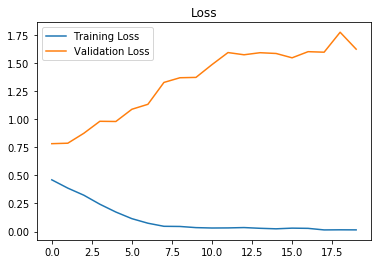

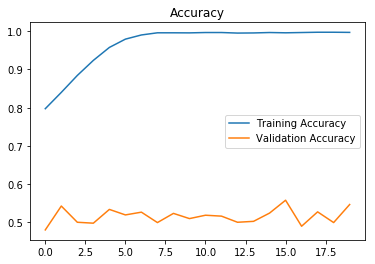

In [126]:
plot_metrics(his)